In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


# **Train dataset**

In [4]:
##Load the dataset.
train_df=pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv")
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
##Function to extract basic details from the dataset.
def basic_details(dataframe):
    print("Shape:",dataframe.shape)
    print("\nDuplicate entries:",dataframe.duplicated().sum())
    if(dataframe.isnull().sum().any()):
        for col,val in dataframe.isnull().sum().iteritems():
            if(val>0):
                print("\nMissing Entries:\n",(col,val))
    else:
        print("\nMissing Entries: 0")
    
    print("\nColumns with their datatype:\n",dataframe.dtypes)
    print("\nTypes of sentiment:\n",dataframe['Sentiment'].value_counts())
    plt.figure(figsize=(9,5))
    sns.countplot(data=dataframe,x='Sentiment')
    plt.show()
    

*******************TRAIN***************
Shape: (41157, 6)

Duplicate entries: 0

Missing Entries:
 ('Location', 8590)

Columns with their datatype:
 UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

Types of sentiment:
 Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


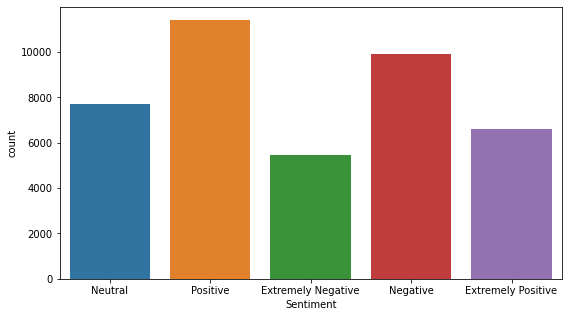

In [6]:
##Invoke the function basic_details on the train dataset.
print("*******************TRAIN***************")
basic_details(train_df)

In [7]:
##Function to convert Extremely Neagtive Sentiment as Negative and Extremely Positive Sentiment as Positive.
def conversion(dataframe):
    dataframe['Sentiment'].replace(to_replace='Extremely Negative',value='Negative',inplace=True)
    dataframe['Sentiment'].replace(to_replace='Extremely Positive',value='Positive',inplace=True)


In [8]:
##Invoke the function conversion on the train dataset.
conversion(train_df)

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64 



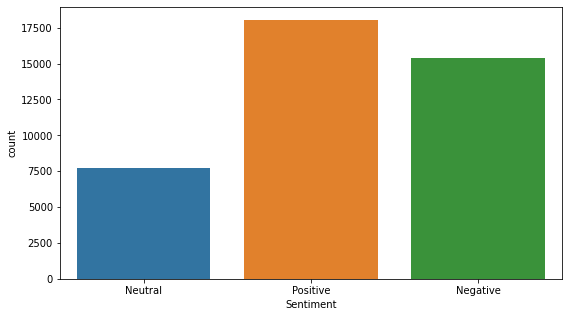

In [9]:
##Analyze the Sentiment column of the train dataset .
print(train_df['Sentiment'].value_counts(),"\n")
plt.figure(figsize=(9,5))
sns.countplot(data=train_df,x='Sentiment')
plt.show()

In [12]:
##Analyze the OriginalTweet in the train dataset.
for text in train_df['OriginalTweet'][1000:1010].values.tolist():
    print("##################")
    print(text)

##################
Okay, people. With #COVID2019, there's a few things I need to mention.

I work in a grocery store, part of a large national chain. Right now we are pushed to our absolute limits.

We're doing double - sometimes triple - what we normally do in daily sales. So, with that said (1/?)
##################
Atlanta-based furniture store chain Havertys said Tuesday that in response to the COVID-19 outbreak it will temporarily close its retail locations beginning March 19 until April 2. https://t.co/qyaO3eDUrq
##################
While people are busy looking after themselves &amp; stock piling food &amp; toilet roll. We wanted to say a big thank you to those who put others first - whatever the situation!

#Nurses #Nurses2020 #NHS #ActsOfKindness #ThankYou #TuesdayThoughts #COVID2019 #DontBeASpreader #business # https://t.co/t3ILzVT1F0
##################
More Rwandans opt for online shopping amidst COVID-19 pandemic https://t.co/nCRBHWCpE0 via @NewTimesRwanda
##################


In [13]:
##Function to extract links from the the OriginalTweet.
def extract_links(text):
    links=re.findall(r'(https?://\S+)', text)
    return(links)


In [14]:
##Invoke the function extract_links on the train dataset.
train_df['Links']=train_df['OriginalTweet'].apply(lambda x: extract_links(x))
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Links
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[https://t.co/iFz9FAn2Pa, https://t.co/xX6ghGF..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[]
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[https://t.co/bInCA9Vp8P]
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,[https://t.co/zrlG0Z520j]
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,[https://t.co/usmuaLq72n]


In [35]:
##Function to clean the tweet.
##Replace the Links with a space in the OriginalTweet and store it in the new column Tweet.

def clean_text(text,links):
    if(len(links)>0):
        for i in links:
            text=text.replace(i," ")
        
       
    
    text=re.sub(r"\s+"," ",text)
    text=re.sub(r'[`~!@#$%^&*)(_+=|\;:.,><?/]',"",text)
    text=re.sub(r'"', '', text)
    text=text.lower()
    text=text.strip(" ")
    return text
    

In [16]:
##Invoke the function clean_text on the train dataset.
train_df['Tweet']=train_df.apply(lambda train_df: clean_text(train_df['OriginalTweet'],train_df['Links']) ,axis=1)
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Links,Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[https://t.co/iFz9FAn2Pa, https://t.co/xX6ghGF...",menyrbie philgahan chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[https://t.co/bInCA9Vp8P],coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,[https://t.co/zrlG0Z520j],my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,[https://t.co/usmuaLq72n],me ready to go at supermarket during the covid...


In [17]:
##Compare the original and the cleaned Tweet on the train dataset.
for text,clean_text in train_df[['OriginalTweet','Tweet']][50:60].values.tolist():
    print("##################")
    print(text,"\n")
    print("**********************")
    print(clean_text,"\n")

##################
"Everything were seeing in the current COVID-19 outbreak has been seen before in previous epidemics and pandemics; the rise of fear, racism, panic buying of food and medicines, conspiracy theories, the proliferation of quack cures" https://t.co/Pr8NpKX41A 

**********************
everything were seeing in the current covid-19 outbreak has been seen before in previous epidemics and pandemics the rise of fear racism panic buying of food and medicines conspiracy theories the proliferation of quack cures 

##################
Everyone is closed, but we remain open because we are an emergency store. Thank your retail workers.

#covid_19 #pandemic #socialdistancing #retail https://t.co/WtB0B1AMON 

**********************
everyone is closed but we remain open because we are an emergency store thank your retail workers covid19 pandemic socialdistancing retail 

##################
Why we stock up on water... cause utility companies will shut you off in the middle of a pandem

In [18]:
##Function to extract the tweet length   
def tweet_length(tweet):
    str_len=len(tweet.split(" "))
    return(str_len)


In [19]:
##Invoke the function tweet_length on the train dataset.
train_df['CleanedTweetLength']=train_df['Tweet'].apply(lambda tweet:tweet_length(tweet))
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Links,Tweet,CleanedTweetLength
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[https://t.co/iFz9FAn2Pa, https://t.co/xX6ghGF...",menyrbie philgahan chrisitv and and,5
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,[],advice talk to your neighbours family to excha...,38
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,[https://t.co/bInCA9Vp8P],coronavirus australia woolworths to give elder...,13
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,[https://t.co/zrlG0Z520j],my food stock is not the only one which is emp...,41
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,[https://t.co/usmuaLq72n],me ready to go at supermarket during the covid...,39


Unique Tweet Lengths:

 [ 5 38 13 41 39 35 27 12 44 42 43 19 29  1 24 31 20 40 36 50 32 23 22 21
 28 15 33 30 17 14 47 49  9 26 10 51 37 48 59 53 45 34 11  7 25 46  4 54
 55 18 16 52 56  8  6  3 61 57 60  2 58 64 62]

Describe Tweet Lengths:

 count    41157.000000
mean        29.871273
std         11.731347
min          1.000000
25%         21.000000
50%         31.000000
75%         39.000000
max         64.000000
Name: CleanedTweetLength, dtype: float64 



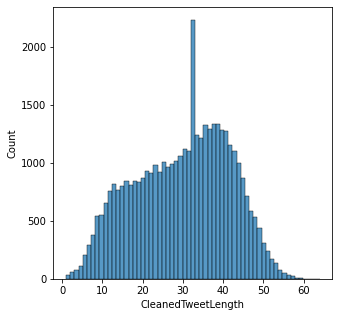

In [20]:
##Analyze the CleanedTweetLength on the train dataset
print("Unique Tweet Lengths:\n\n",train_df['CleanedTweetLength'].unique())
print("\nDescribe Tweet Lengths:\n\n",train_df['CleanedTweetLength'].describe(),"\n")
plt.figure(figsize=(5,5))
sns.histplot(data=train_df,x='CleanedTweetLength')
plt.show()

In [21]:
##Considering only the Tweet and the Sentiment
Y_TRAIN=train_df.Sentiment
X_TRAIN=train_df.Tweet

In [22]:
##LablelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y_TRAIN=le.fit_transform(Y_TRAIN)

In [23]:
##The index of the label in le.classes_ is the encoded value of the label.
print("\n",le.classes_)
print(le.inverse_transform([0,1,2]))


 ['Negative' 'Neutral' 'Positive']
['Negative' 'Neutral' 'Positive']


In [24]:
## max_words :No of distinct words to encode
## max_len :Length of each sequence
max_words = 50000
max_len = 50


In [25]:
##Tokenizing
from keras.preprocessing.text import Tokenizer
tok = Tokenizer(num_words=max_words,oov_token='</OOV>')
tok.fit_on_texts(X_TRAIN)
wordindex=tok.word_index

In [26]:
#Sequencing
from keras.preprocessing import sequence
sequences = tok.texts_to_sequences(X_TRAIN)

In [27]:
print(sequences[0:10])

[[24071, 24072, 13371, 4, 4], [522, 920, 3, 36, 2649, 276, 3, 2898, 905, 1301, 1142, 446, 404, 24, 905, 1301, 5, 2649, 1257, 4080, 3678, 5041, 500, 42, 53, 50, 2448, 52, 24073, 3355, 193, 5, 1094, 3515, 51, 38, 111, 245], [8, 836, 1844, 3, 328, 335, 1388, 1903, 50, 274, 161, 13, 11, 135], [40, 21, 84, 10, 38, 2, 103, 86, 178, 10, 229, 96, 172, 69, 83, 39, 30, 254, 21, 9, 149, 52, 15, 70, 38, 131, 48, 108, 15, 63, 112, 1033, 112, 168, 11410, 16, 16, 8, 4670, 16718, 24074], [87, 769, 3, 79, 20, 22, 56, 2, 16, 135, 38, 105, 234, 4354, 51, 105, 40, 21, 84, 10, 24075, 229, 2, 8, 10, 6, 876, 320, 51, 96, 172, 69, 31, 1779, 442, 24076, 11411, 394, 4670], [29, 195, 5, 2, 16719, 188, 1237, 13, 11, 600, 790, 43, 5, 16720, 877, 196, 160, 32, 11412, 3, 585, 118, 3, 695, 675, 193, 82, 72, 21, 104, 110, 4, 102, 302, 24077, 469], [1224, 20, 26, 23, 74, 1397, 255, 791, 14, 16, 3, 3204, 255, 11413, 191, 11414, 234, 7, 24078, 1639, 58, 17, 129, 65, 234, 1003, 62], [74, 20, 2, 22, 116, 1034, 114, 104, 11

In [29]:
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len,padding='post')

In [30]:
print(sequences_matrix[0:10])

[[24071 24072 13371     4     4     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [  522   920     3    36  2649   276     3  2898   905  1301  1142   446
    404    24   905  1301     5  2649  1257  4080  3678  5041   500    42
     53    50  2448    52 24073  3355   193     5  1094  3515    51    38
    111   245     0     0     0     0     0     0     0     0     0     0
      0     0]
 [    8   836  1844     3   328   335  1388  1903    50   274   161    13
     11   135     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0]
 [   40    21    84    10    38     2   103    86   178    10   229

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model1=Sequential()
model1.add(Embedding(input_dim=max_words,output_dim=50,input_length=max_len))
model1.add(LSTM(64))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(15,activation='relu'))
model1.add(Dense(3,activation='softmax'))

In [32]:
model1.summary()
model1.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            2500000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                495       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 48        
Total params: 2,532,063
Trainable params: 2,532,063
Non-trainable params: 0
_________________________________________________________________


In [33]:
model1.fit(sequences_matrix,Y_TRAIN,batch_size=128,epochs=40,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/40
258/258 [==============================] - 25s 90ms/step - loss: 1.0243 - accuracy: 0.4283 - val_loss: 0.8777 - val_accuracy: 0.5502
Epoch 2/40
258/258 [==============================] - 22s 87ms/step - loss: 0.7872 - accuracy: 0.5565 - val_loss: 0.8150 - val_accuracy: 0.5811
Epoch 3/40
258/258 [==============================] - 22s 87ms/step - loss: 0.6637 - accuracy: 0.6413 - val_loss: 0.5747 - val_accuracy: 0.7951
Epoch 4/40
258/258 [==============================] - 23s 88ms/step - loss: 0.3340 - accuracy: 0.8880 - val_loss: 0.5478 - val_accuracy: 0.8107
Epoch 5/40
258/258 [==============================] - 22s 87ms/step - loss: 0.1987 - accuracy: 0.9408 - val_loss: 0.5714 - val_accuracy: 0.8202


# **Test dataset**

In [34]:
##Load the test dataset.
test_df=pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv")

##Invoke the function conversion on the test dataset.
conversion(test_df)

##Invoke the function extract_links on the test dataset.
test_df['Links']=test_df['OriginalTweet'].apply(lambda x: extract_links(x))
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Links
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative,"[https://t.co/Gr76pcrLWh, https://t.co/ivMKMsq..."
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,[https://t.co/ygbipBflMY]
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Positive,[]
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,"[https://t.co/IASiReGPC4, https://t.co/29isZOe..."
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,[https://t.co/ScZryVvsIh]


In [36]:
##Invoke the function clean_text on the test dataset.
test_df['Tweet']=test_df.apply(lambda test_df: clean_text(test_df['OriginalTweet'],test_df['Links']),axis=1)
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Links,Tweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Negative,"[https://t.co/Gr76pcrLWh, https://t.co/ivMKMsq...",trending new yorkers encounter empty supermark...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,[https://t.co/ygbipBflMY],when i couldn't find hand sanitizer at fred me...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Positive,[],find out how you can protect yourself and love...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,"[https://t.co/IASiReGPC4, https://t.co/29isZOe...",panic buying hits newyork city as anxious shop...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,[https://t.co/ScZryVvsIh],toiletpaper dunnypaper coronavirus coronavirus...


In [37]:
##Considering only the Tweet and the Sentiment
Y_TEST=train_df.Sentiment
X_TEST=train_df.Tweet

##LablelEncoding 
Y_TEST=le.transform(Y_TEST)

##SEQUENCING
test_sequences = tok.texts_to_sequences(X_TEST)

##PADDING
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [38]:
test_loss,test_accr = model1.evaluate(test_sequences_matrix,Y_TEST,verbose=2)

1287/1287 - 11s - loss: 0.5222 - accuracy: 0.8400


In [69]:
txt = ['India needs to fight the covid']
seq = tok.texts_to_sequences(txt)
padded = sequence.pad_sequences(seq,maxlen=max_len,padding='post')
pred = model1.predict_classes(padded)

print(seq)
print(padded)
if(pred==0):
    print('Negative')
elif(pred==1):
    print('Neutral')
elif(pred==2):
    print('Positive')

[[477, 293, 3, 297, 2, 13]]
[[477 293   3 297   2  13   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
Negative


In [70]:
model1.save('CovidTweetClassification.h5')